In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier 
from sklearn.linear_model import LogisticRegression


import warnings
warnings.filterwarnings('ignore')


# loading data
datapath = "/home/mjolnir/Desktop/DeepL/Projects /parkinsons_data/parkinsons.data"
data = pd.read_csv(datapath) # we use dropna to remove all columns that have null data
data.head()
#len(data.columns)

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [2]:
data.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,...,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,...,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,...,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,...,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,...,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


In [3]:
# The variable 1 indicates parkinsons detection and 0 for non detectioin
data["status"].value_counts()

status
1    147
0     48
Name: count, dtype: int64

In [4]:
print(data.dtypes)

name                 object
MDVP:Fo(Hz)         float64
MDVP:Fhi(Hz)        float64
MDVP:Flo(Hz)        float64
MDVP:Jitter(%)      float64
MDVP:Jitter(Abs)    float64
MDVP:RAP            float64
MDVP:PPQ            float64
Jitter:DDP          float64
MDVP:Shimmer        float64
MDVP:Shimmer(dB)    float64
Shimmer:APQ3        float64
Shimmer:APQ5        float64
MDVP:APQ            float64
Shimmer:DDA         float64
NHR                 float64
HNR                 float64
status                int64
RPDE                float64
DFA                 float64
spread1             float64
spread2             float64
D2                  float64
PPE                 float64
dtype: object


In [5]:
# Group the data based on the status of the disease
grouped_data=data.drop(columns=['name'],axis=-1)
grouped_data.groupby("status").mean()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
status,,,,,,,,,,,,,,,,,,,,,
0,181.937771,223.636750,145.207292,0.003866,0.000023,0.001925,0.002056,0.005776,0.017615,0.162958,...,0.013305,0.028511,0.011483,24.678750,0.442552,0.695716,-6.759264,0.160292,2.154491,0.123017
1,145.180762,188.441463,106.893558,0.006989,0.000051,0.003757,0.003900,0.011273,0.033658,0.321204,...,0.027600,0.053027,0.029211,20.974048,0.516816,0.725408,-5.333420,0.248133,2.456058,0.233828


In [6]:
X_data=data.drop(columns=['status'],axis=-1)
Y_target=data['status']

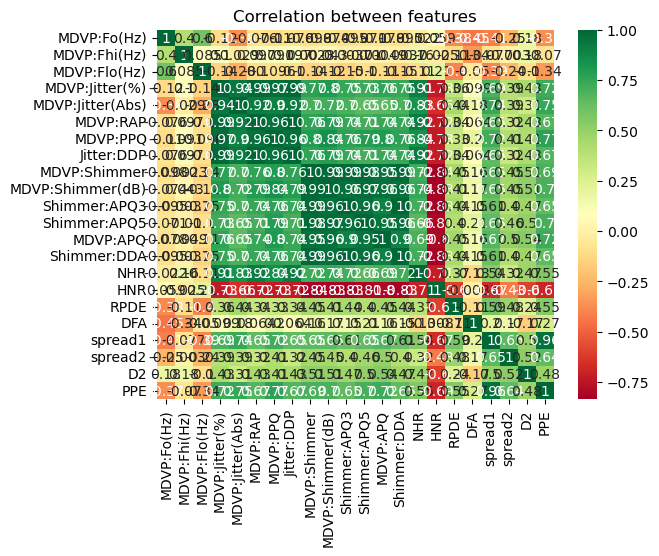

In [7]:
# checking for correlation in my data
# correlation between the features
corr = X_data.drop(["name"], axis=1).corr()

sns.heatmap(corr, annot=True, cmap="RdYlGn")

plt.title("Correlation between features")
plt.show()

In [8]:
# splitting data into training and testing

X_train, X_test, y_train, y_test = train_test_split(
    X_data, Y_target, test_size=0.25, random_state=42
)

print(f"Train: {X_train.shape}, {y_train.shape}")
print(f"Test: {X_test.shape}, {y_test.shape}")

Train: (146, 23), (146,)
Test: (49, 23), (49,)


In [9]:
# standardize the data (mean=0 and std=1) for an easy procesing

scaler = StandardScaler()
X_train_transformed = scaler.fit_transform(X_train.drop(["name"], axis=1))
X_test_transformed = scaler.fit_transform(X_test.drop(["name"], axis=1))

X_train_transformed[:1]

array([[ 1.85613679,  0.53564414, -0.07744502, -0.71260248, -0.89699413,
        -0.58932878, -0.67345761, -0.58944371, -0.61382545, -0.61910238,
        -0.57643787, -0.49942639, -0.65903109, -0.57614589, -0.48638844,
         0.53228039, -1.82304089, -0.74736755, -1.43420323, -2.64353763,
        -0.65636817, -1.20676677]])

In [10]:
# Train the model
# Create an SVM classifier
svm_classifier = SVC()

# Train the SVM model
svm_classifier.fit(X_train_transformed , y_train)

# Make predictions 
y_pred = svm_classifier.predict(X_test_transformed)

#Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the SVM model: {accuracy*100:.4f}%")

Accuracy of the SVM model: 87.7551%


In [11]:
# Create a Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42) # n_estimators is the number of trees in the forest model

# Train the model
rf_classifier.fit(X_train_transformed, y_train)

# Make predictions
y_pred = rf_classifier.predict(X_test_transformed)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the Random Forest model: {accuracy*100:.2f}%")

Accuracy of the Random Forest model: 89.80%


In [12]:
# Create a Logistic Regression model
logistic_model = LogisticRegression()

# Train the model
logistic_model.fit(X_train_transformed, y_train)

# Make predictions
y_pred = logistic_model.predict(X_test_transformed)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the Logistic Regression model: {accuracy*100:.2f}%")

Accuracy of the Logistic Regression model: 89.80%


In [13]:
# Making predictions on the test data with the various models 

# Making predictions on the test data
y_pred_rf = rf_classifier.predict(X_test_transformed)
y_pred_svm = svm_classifier.predict(X_test_transformed)
y_pred_logistic = logistic_model.predict(X_test_transformed)


# Calculate accuracy for each model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
accuracy_logistic = accuracy_score(y_test, y_pred_logistic)

print(f"Accuracy of Random Forest model: {accuracy_rf*100:.2f}%")
print(f"Accuracy of SVM model: {accuracy_svm*100:.2f}%")
print(f"Accuracy of Logistic Regression model: {accuracy_logistic*100:.2f}%")

Accuracy of Random Forest model: 89.80%
Accuracy of SVM model: 87.76%
Accuracy of Logistic Regression model: 89.80%


In [14]:
# Comparing prediction to actual values
comparison = pd.DataFrame({"Actual": y_test, "Random Forest": y_pred_rf, "SVM": y_pred_svm, "Logistic Regression": y_pred_logistic})
comparison

,Actual,Random Forest,SVM,Logistic Regression
138,1,1,1,1
16,1,1,1,1
155,1,1,1,1
96,1,1,1,1
68,1,1,1,1
153,1,1,1,1
55,1,1,1,1
15,1,1,1,1
112,1,1,1,1
111,1,1,1,1


In [15]:
# check for wrong predictions in test data for all models (randomforest , sVM and logistic regression)


# Create a DataFrame to store the predictions
predictions_df = pd.DataFrame({"name": X_test["name"],"Actual": y_test})

# Add predictions for each model to the DataFrame
predictions_df["Random Forest"] = rf_classifier.predict(X_test_transformed)
predictions_df["SVM"] = svm_classifier.predict(X_test_transformed)
predictions_df["Logistic Regression"] = logistic_model.predict(X_test_transformed)

# Filter out the incorrect predictions for each model
for model in ["Random Forest", "SVM", "Logistic Regression"]:
    incorrect_predictions = predictions_df[predictions_df["Actual"] != predictions_df[model]]
    print(f"Incorrect predictions for {model}:")
    print(incorrect_predictions)

# If you want to count the incorrect predictions:
for model in ["Random Forest", "SVM", "Logistic Regression"]:
     count_incorrect = len(predictions_df[predictions_df["Actual"] != predictions_df[model]])
     print(f"Number of incorrect predictions for {model}: {count_incorrect}")

Incorrect predictions for Random Forest:
               name  Actual  Random Forest  SVM  Logistic Regression
184  phon_R01_S49_2       0              1    1                    1
30   phon_R01_S07_1       0              1    0                    0
172  phon_R01_S43_2       0              1    1                    1
168  phon_R01_S42_4       0              1    1                    1
190  phon_R01_S50_2       0              1    1                    1
Incorrect predictions for SVM:
               name  Actual  Random Forest  SVM  Logistic Regression
184  phon_R01_S49_2       0              1    1                    1
192  phon_R01_S50_4       0              0    1                    1
172  phon_R01_S43_2       0              1    1                    1
168  phon_R01_S42_4       0              1    1                    1
35   phon_R01_S07_6       0              0    1                    0
190  phon_R01_S50_2       0              1    1                    1
Incorrect predictions for Logis

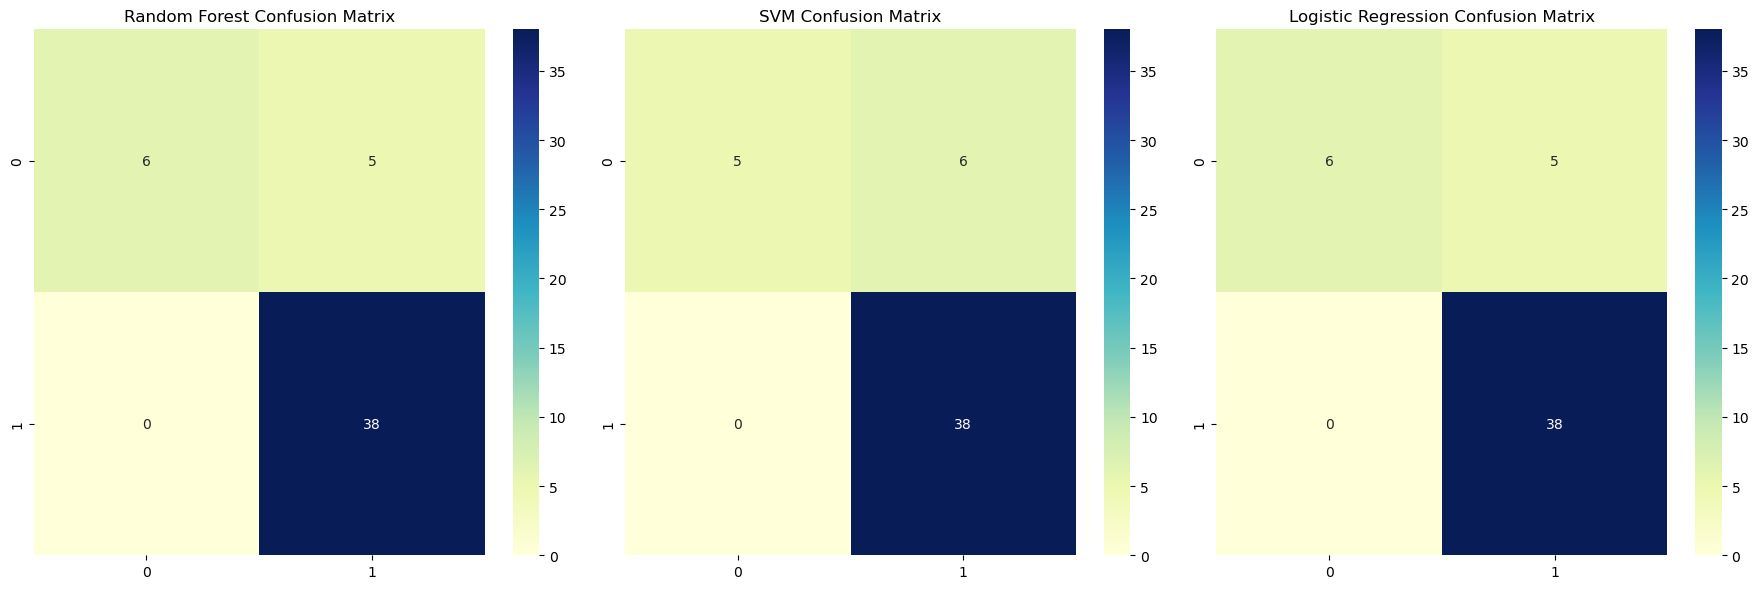

In [16]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Create subplots for displaying confusion matrices in a single row
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Generate and display confusion matrix for Random Forest
rf_conf_matrix = confusion_matrix(y_test, rf_classifier.predict(X_test_transformed))
sns.heatmap(rf_conf_matrix, annot=True, cmap="YlGnBu", fmt="d", ax=axes[0])
axes[0].set_title("Random Forest Confusion Matrix")

# Generate and display confusion matrix for SVM
svm_conf_matrix = confusion_matrix(y_test, svm_classifier.predict(X_test_transformed))
sns.heatmap(svm_conf_matrix, annot=True, cmap="YlGnBu", fmt="d", ax=axes[1])
axes[1].set_title("SVM Confusion Matrix")

# Generate and display confusion matrix for Logistic Regression
lr_conf_matrix = confusion_matrix(y_test, logistic_model.predict(X_test_transformed))
sns.heatmap(lr_conf_matrix, annot=True, cmap="YlGnBu", fmt="d", ax=axes[2])
axes[2].set_title("Logistic Regression Confusion Matrix")

plt.tight_layout()
plt.show()

In [17]:
# create unseen data and test it against your model

Unseen_data=pd.read_csv("/home/mjolnir/Desktop/DeepL/Projects /parkinsons_data/parkinsons_updrs.data")
datapath = "/home/mjolnir/Desktop/DeepL/Projects /parkinsons_data/parkinsons.data"
Training_data = pd.read_csv(datapath) 

# Read the column names of the first data file
columns_df1 = set(Unseen_data.columns)
columns_df2 = set(Training_data.columns)

# Find the common column names in both data files
common_columns = columns_df1.intersection(columns_df2)

# Select only the common columns
Unseen_data = Unseen_data[list(common_columns)]
Unseen_data.head()

,NHR,PPE,RPDE,Jitter:DDP,Shimmer:APQ5,Shimmer:APQ3,DFA,Shimmer:DDA,HNR
0,0.014290,0.16006,0.41888,0.01204,0.01309,0.01438,0.54842,0.04314,21.640
1,0.011112,0.10810,0.43493,0.00395,0.01072,0.00994,0.56477,0.02982,27.183
2,0.020220,0.21014,0.46222,0.00616,0.00844,0.00734,0.54405,0.02202,23.047
3,0.027837,0.33277,0.48730,0.00573,0.01265,0.01106,0.57794,0.03317,24.445
4,0.011625,0.19361,0.47188,0.00278,0.00929,0.00679,0.56122,0.02036,26.126


In [24]:
# Normalising the Unseen data using the same scaler used for the training data 
scaler = StandardScaler()
normalized_Unseen_data = scaler.fit_transform(Unseen_data)

In [25]:
from sklearn.preprocessing import PolynomialFeatures

# Assuming unseen_data is your original dataframe with 9 features

# Create polynomial features to expand the feature set
poly = PolynomialFeatures(2, include_bias=False)  # Degree 2 to expand to 22 features
Unseen_data_poly = poly.fit_transform(normalized_Unseen_data )

# Convert the polynomial features array back to a DataFrame
# Generate new column names for the polynomial features
poly_column_names = poly.get_feature_names_out(Unseen_data.columns)
Unseen_data_poly_df = pd.DataFrame(Unseen_data_poly, columns=poly_column_names)

Unseen_featured_data = Unseen_data_poly_df.iloc[:, :22]


y_pred_rf = rf_classifier.predict(Unseen_featured_data)
y_pred_svm = svm_classifier.predict(Unseen_featured_data)
y_pred_logistic = logistic_model.predict(Unseen_featured_data)


# Assuming y_pred_rf, y_pred_svm, y_pred_logistic contain predictions from each model
predictions_df_rf = pd.DataFrame({'status_rf': y_pred_rf})
predictions_df_svm = pd.DataFrame({'status_svm': y_pred_svm})
predictions_df_logistic = pd.DataFrame({'status_logistic': y_pred_logistic})

# Map the status values to disease labels for each model
predictions_df_rf['disease_rf'] = predictions_df_rf['status_rf'].map({0: 'No Parkinson\'s', 1: 'Parkinson\'s'})
predictions_df_svm['disease_svm'] = predictions_df_svm['status_svm'].map({0: 'No Parkinson\'s', 1: 'Parkinson\'s'})
predictions_df_logistic['disease_logistic'] = predictions_df_logistic['status_logistic'].map({0: 'No Parkinson\'s', 1: 'Parkinson\'s'})

# Concatenate the predictions_df with your original dataset 
dataset_with_predictions = pd.concat([Unseen_data, predictions_df_rf, predictions_df_svm, predictions_df_logistic], axis=1)

dataset_with_predictions.head()

,NHR,PPE,RPDE,Jitter:DDP,Shimmer:APQ5,Shimmer:APQ3,DFA,Shimmer:DDA,HNR,status_rf,disease_rf,status_svm,disease_svm,status_logistic,disease_logistic
0,0.014290,0.16006,0.41888,0.01204,0.01309,0.01438,0.54842,0.04314,21.640,1,Parkinson's,1,Parkinson's,1,Parkinson's
1,0.011112,0.10810,0.43493,0.00395,0.01072,0.00994,0.56477,0.02982,27.183,1,Parkinson's,1,Parkinson's,1,Parkinson's
2,0.020220,0.21014,0.46222,0.00616,0.00844,0.00734,0.54405,0.02202,23.047,1,Parkinson's,1,Parkinson's,1,Parkinson's
3,0.027837,0.33277,0.48730,0.00573,0.01265,0.01106,0.57794,0.03317,24.445,1,Parkinson's,1,Parkinson's,1,Parkinson's
4,0.011625,0.19361,0.47188,0.00278,0.00929,0.00679,0.56122,0.02036,26.126,1,Parkinson's,1,Parkinson's,1,Parkinson's
